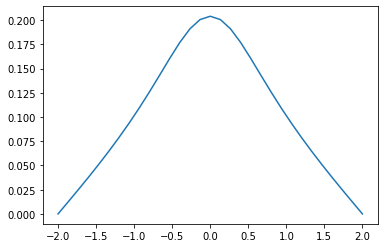

In [5]:
from fenics import *
import numpy as np
import time

T = 2.0            # final time
num_steps = 1     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = 30
mesh = IntervalMesh( nx, -2,2)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
#vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    #vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)


In [18]:
nx = 5
mesh = IntervalMesh( nx, -2,2)
V = FunctionSpace(mesh, 'P', 1)
u = TrialFunction(V)
v = TestFunction(V)
A = u*v*dx
K = u.dx(0)*v.dx(0)*dx
A11 =assemble(A)
A22 = assemble(K)

h=mesh.hmax()
print(mesh.hmax())
print(1/h*np.array(A11.array()))
print(h*np.array(A22.array()))

0.8000000000000003
[[ 0.33333333  0.16666667  0.          0.          0.          0.        ]
 [ 0.16666667  0.66666667  0.16666667  0.          0.          0.        ]
 [ 0.          0.16666667  0.66666667  0.16666667  0.          0.        ]
 [ 0.          0.          0.16666667  0.66666667  0.16666667  0.        ]
 [ 0.          0.          0.          0.16666667  0.66666667  0.16666667]
 [ 0.          0.          0.          0.          0.16666667  0.33333333]]
[[ 1. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


In [10]:
print(mesh.hmax()/3)

0.044444444444444585


In [16]:
1/6

0.16666666666666666